In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
coordinates = lat_lngs

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [5]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=151dfc56a11fc6bb888ef2aa4a3b5f43


In [7]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    
    


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | douala
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | torbay
Processing Record 4 of Set 1 | ushuaia
Processing Record 5 of Set 1 | bengkulu
Processing Record 6 of Set 1 | maneadero
Processing Record 7 of Set 1 | chokurdakh
Processing Record 8 of Set 1 | vardo
Processing Record 9 of Set 1 | yumen
Processing Record 10 of Set 1 | lolua
City not found. Skipping...
Processing Record 11 of Set 1 | boralday
Processing Record 12 of Set 1 | cherskiy
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | kabansk
Processing Record 15 of Set 1 | paramonga
Processing Record 16 of Set 1 | cabo san lucas
Processing Record 17 of Set 1 | coahuayana
Processing Record 18 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 19 of Set 1 | nizwa
Processing Record 20 of Set 1 | victoria
Processing Record 21 of Set 1 | port alfred
Processing Record 22 of Set 1 | rundu


Processing Record 38 of Set 4 | priargunsk
Processing Record 39 of Set 4 | alyangula
Processing Record 40 of Set 4 | havoysund
Processing Record 41 of Set 4 | malwan
City not found. Skipping...
Processing Record 42 of Set 4 | totness
Processing Record 43 of Set 4 | natal
Processing Record 44 of Set 4 | dingle
Processing Record 45 of Set 4 | wewak
Processing Record 46 of Set 4 | bredasdorp
Processing Record 47 of Set 4 | airai
Processing Record 48 of Set 4 | viligili
City not found. Skipping...
Processing Record 49 of Set 4 | caravelas
Processing Record 50 of Set 4 | laguna
Processing Record 1 of Set 5 | cape town
Processing Record 2 of Set 5 | avarua
Processing Record 3 of Set 5 | oudtshoorn
Processing Record 4 of Set 5 | ostersund
Processing Record 5 of Set 5 | babanusah
City not found. Skipping...
Processing Record 6 of Set 5 | chulman
Processing Record 7 of Set 5 | ostrovnoy
Processing Record 8 of Set 5 | along
Processing Record 9 of Set 5 | hays
Processing Record 10 of Set 5 | bocs

Processing Record 24 of Set 8 | sirtich
Processing Record 25 of Set 8 | monrovia
Processing Record 26 of Set 8 | lavrentiya
Processing Record 27 of Set 8 | linxia
Processing Record 28 of Set 8 | cody
Processing Record 29 of Set 8 | nabire
Processing Record 30 of Set 8 | iqaluit
Processing Record 31 of Set 8 | north platte
Processing Record 32 of Set 8 | sechura
Processing Record 33 of Set 8 | coos bay
Processing Record 34 of Set 8 | villa carlos paz
Processing Record 35 of Set 8 | cap malheureux
Processing Record 36 of Set 8 | uglegorsk
Processing Record 37 of Set 8 | paita
Processing Record 38 of Set 8 | mendahara
City not found. Skipping...
Processing Record 39 of Set 8 | malanje
Processing Record 40 of Set 8 | kurumkan
Processing Record 41 of Set 8 | belmonte
Processing Record 42 of Set 8 | yanji
Processing Record 43 of Set 8 | santa rosa
Processing Record 44 of Set 8 | isangel
Processing Record 45 of Set 8 | umiray
Processing Record 46 of Set 8 | najran
Processing Record 47 of Set 

Processing Record 11 of Set 12 | gibara
Processing Record 12 of Set 12 | kumluca
Processing Record 13 of Set 12 | nokaneng
Processing Record 14 of Set 12 | riosucio
Processing Record 15 of Set 12 | general cepeda
Processing Record 16 of Set 12 | camopi
Processing Record 17 of Set 12 | san policarpo
Processing Record 18 of Set 12 | santarem
Processing Record 19 of Set 12 | puerto escondido
Processing Record 20 of Set 12 | niquero
Processing Record 21 of Set 12 | tasbuget
City not found. Skipping...
Processing Record 22 of Set 12 | farafangana
Processing Record 23 of Set 12 | bathurst
Processing Record 24 of Set 12 | mezdra
Processing Record 25 of Set 12 | rize
Processing Record 26 of Set 12 | sorland
Processing Record 27 of Set 12 | safaga
Processing Record 28 of Set 12 | marang
Processing Record 29 of Set 12 | chapais
Processing Record 30 of Set 12 | bud
Processing Record 31 of Set 12 | eidsvag
Processing Record 32 of Set 12 | laramie
Processing Record 33 of Set 12 | ketchikan
Processi

In [11]:
len(city_data)

563

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Douala,4.05,9.70,84.20,83,75,5.82,CM,2020-07-09 16:30:03
1,Dikson,73.51,80.55,44.22,83,0,16.75,RU,2020-07-09 16:30:03
2,Torbay,47.67,-52.73,64.00,59,75,6.93,CA,2020-07-09 16:30:04
3,Ushuaia,-54.80,-68.30,37.40,74,20,3.36,AR,2020-07-09 16:30:04
4,Bengkulu,-3.80,102.27,76.57,88,100,8.81,ID,2020-07-09 16:26:51
5,Maneadero,31.72,-116.57,66.00,85,2,3.00,MX,2020-07-09 16:30:04
6,Chokurdakh,70.63,147.92,45.18,79,99,10.85,RU,2020-07-09 16:29:56
7,Vardo,70.37,31.11,48.20,87,75,20.80,NO,2020-07-09 16:30:04
8,Yumen,40.28,97.20,71.67,22,0,10.09,CN,2020-07-09 16:30:04
9,Boralday,43.36,76.86,71.60,49,40,2.24,KZ,2020-07-09 16:30:05


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Douala,CM,2020-07-09 16:30:03,4.05,9.70,84.20,83,75,5.82
1,Dikson,RU,2020-07-09 16:30:03,73.51,80.55,44.22,83,0,16.75
2,Torbay,CA,2020-07-09 16:30:04,47.67,-52.73,64.00,59,75,6.93
3,Ushuaia,AR,2020-07-09 16:30:04,-54.80,-68.30,37.40,74,20,3.36
4,Bengkulu,ID,2020-07-09 16:26:51,-3.80,102.27,76.57,88,100,8.81
5,Maneadero,MX,2020-07-09 16:30:04,31.72,-116.57,66.00,85,2,3.00
6,Chokurdakh,RU,2020-07-09 16:29:56,70.63,147.92,45.18,79,99,10.85
7,Vardo,NO,2020-07-09 16:30:04,70.37,31.11,48.20,87,75,20.80
8,Yumen,CN,2020-07-09 16:30:04,40.28,97.20,71.67,22,0,10.09
9,Boralday,KZ,2020-07-09 16:30:05,43.36,76.86,71.60,49,40,2.24


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time

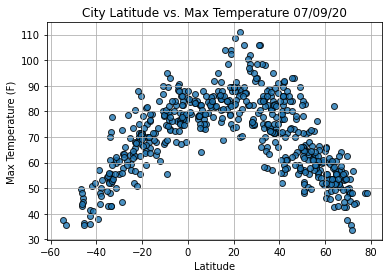

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

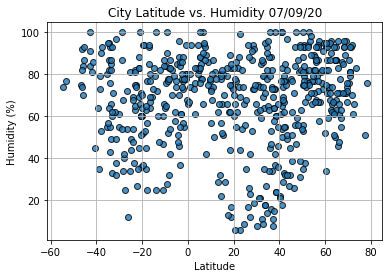

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

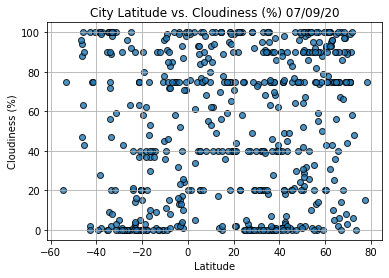

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

In [ ]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()